## Section 2.1 - ICP applied on easy dataset

### Imports

In [ ]:
import numpy as np
from pprint import pprint
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2024-11-16 18:05:41 -03:00)


### Functions

In [ ]:
def nearest_neighbor(P, Q, good_guess=()):
    '''
    Find the nearest (Euclidean) neighbor in dst for each point in src
    Input:
        src: Nxm array of points
        dst: Nxm array of points
    Output:
        List:
          indices of point cloud P
          indices of mathced point cloud Q
          distance
    '''
    p_size = P.shape[1]
    q_size = Q.shape[1]
    correspondences = []
    for i in tqdm(range(p_size)):
      if good_guess and i == good_guess[0]:
        correspondences.append(good_guess)
      else:
        p_point = P[:, i]
        min_dist = 1000000
        chosen_idx = -1
        for j in range(q_size):
            q_point = Q[:, j]
            dist = np.linalg.norm(q_point - p_point)
            if dist < min_dist:
                min_dist = dist
                chosen_idx = j
        correspondences.append((i, chosen_idx, min_dist))
    return correspondences

# Transform parameters
def Rpry(pitch, roll, yaw):
    # Single rotation matrix combining pitch, roll, yaw --> sim, talvez, não
    return np.array([[np.cos(yaw)*np.cos(pitch), np.cos(yaw)*np.sin(pitch)*np.sin(roll) - np.sin(yaw)*np.cos(roll), np.cos(yaw)*np.sin(pitch)*np.cos(roll) + np.sin(yaw)*np.sin(roll)],
                    [np.sin(yaw)*np.cos(pitch), np.sin(yaw)*np.sin(pitch)*np.sin(roll) + np.cos(yaw)*np.cos(roll), np.sin(yaw)*np.sin(pitch)*np.cos(roll) - np.cos(yaw)*np.sin(roll)],
                    [-np.sin(pitch), np.cos(pitch) * np.sin(roll), np.cos(pitch) * np.cos(roll)] ])

# plot functions
def plot_data(data_1, data_2, label_1, label_2, markersize_1=8, markersize_2=8,title=""):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.axis('equal')
    if data_1 is not None:
        x_p, y_p = data_1
        ax.plot(x_p, y_p, color='#336699', markersize=markersize_1, marker='o', linestyle=":", label=label_1)
    if data_2 is not None:
        x_q, y_q = data_2
        ax.plot(x_q, y_q, color='orangered', markersize=markersize_2, marker='o', linestyle=":", label=label_2)
    ax.legend()
    ax.set_title(title)
    return ax

def draw_correspondeces(P, Q, correspondences, ax):
    label_added = False
    for i, j, d in correspondences:
        x = [P[0, i], Q[0, j]]
        y = [P[1, i], Q[1, j]]
        if not label_added:
            ax.plot(x, y, color='grey', label='correpondences')
            label_added = True
        else:
            ax.plot(x, y, color='grey')
    ax.legend()

time: 15 ms (started: 2024-11-16 18:05:41 -03:00)


### Generate data --> copy it --> rotate and shift the copy 

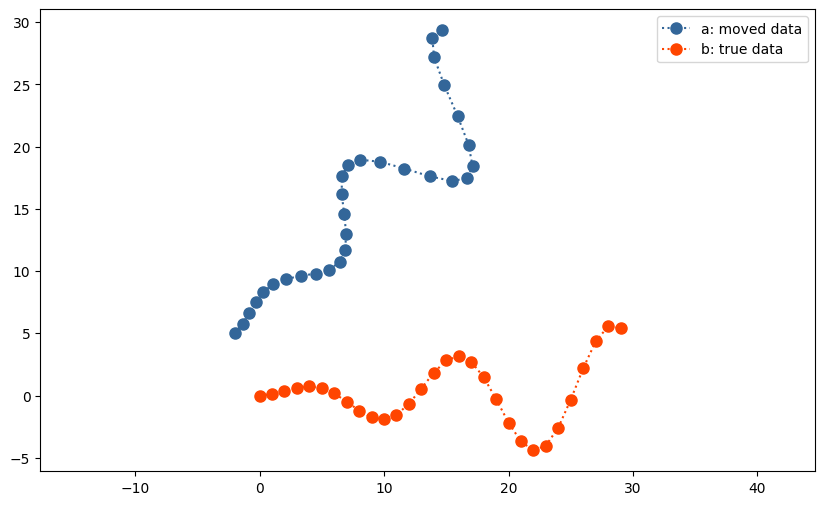

time: 172 ms (started: 2024-11-16 18:05:41 -03:00)


In [4]:
# initialize pertrubation rotation
angle = np.pi / 4
R_true = np.array([[np.cos(angle), -np.sin(angle)],
                   [np.sin(angle),  np.cos(angle)]])
t_true = np.array([[-2], [5]])

# Generate data as a list of 2d points
num_points = 30
true_data = np.zeros((2, num_points))
true_data[0, :] = range(0, num_points)
true_data[1, :] = 0.2 * true_data[0, :] * np.sin(0.5 * true_data[0, :])
# Move the data
moved_data = R_true.dot(true_data) + t_true

# Assign to variables we use in formulas.
b = true_data
a = moved_data

plot_data(moved_data, true_data, "a: moved data", "b: true data")
plt.show()

(2, 30) 
 (2, 30)


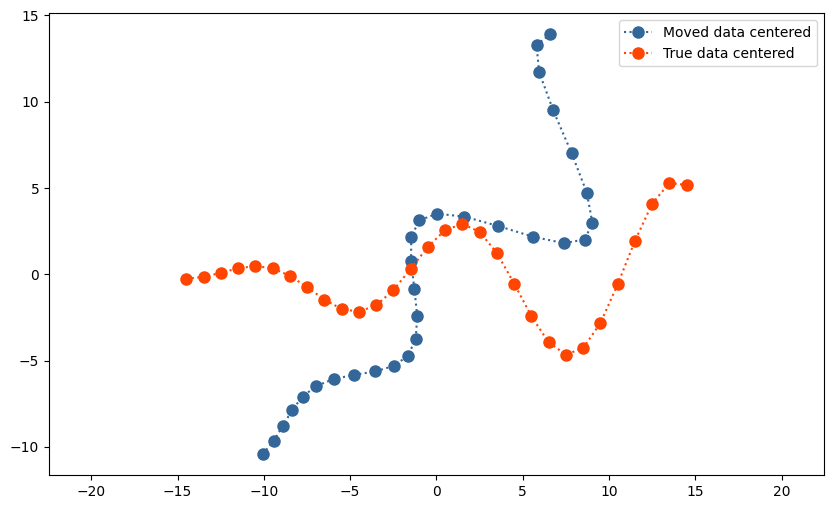

time: 109 ms (started: 2024-11-16 18:05:41 -03:00)


In [5]:
# shift point clouds to its centroid
a_center = a.mean(axis=1).reshape((2,1))
b_center = b.mean(axis=1).reshape((2,1))
a_centered = a - a_center
b_centered = b - b_center
print(a_centered.shape,'\n',b_centered.shape)
ax = plot_data(a_centered, b_centered,
               label_1='Moved data centered',
               label_2='True data centered')
plt.show()

  0%|          | 0/30 [00:00<?, ?it/s]

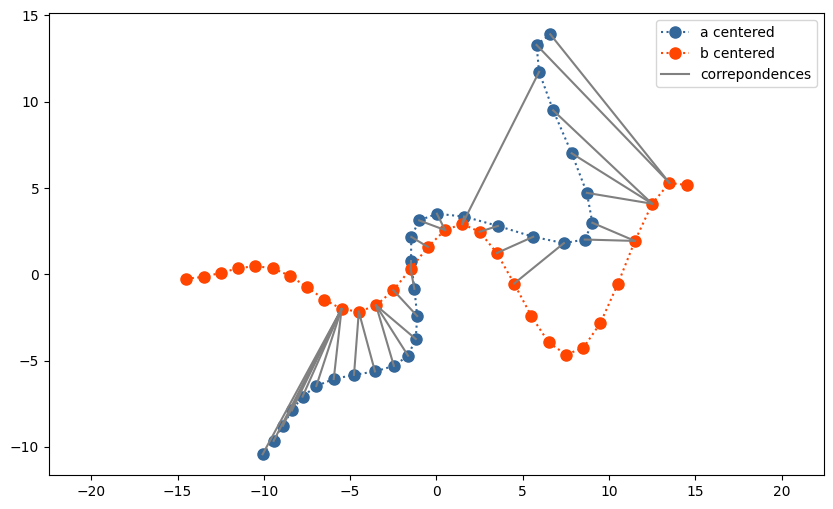

time: 188 ms (started: 2024-11-16 18:05:41 -03:00)


In [6]:
# compute correspondeces with nearest neighboor
correspondences = nearest_neighbor(a_centered, b_centered)

ax = plot_data(a_centered, b_centered,
               label_1='a centered',
               label_2='b centered')
draw_correspondeces(a_centered, b_centered, correspondences, ax)
plt.show()

correspondences:
[(0, 9, 9.583370382167361),
 (1, 9, 8.599378309546077),
 (2, 9, 7.573984961243393),
 (3, 9, 6.542684363175932),
 (4, 9, 5.558516737089527),
 (5, 9, 4.695487736508346),
 (6, 9, 4.083061973288728),
 (7, 10, 3.670059281129938),
 (8, 10, 3.585859606218316),
 (9, 11, 3.6564739649822173),
 (10, 11, 3.45106635264372),
 (11, 11, 3.0131153506348674),
 (12, 12, 2.039075804902581),
 (13, 13, 1.172174460915771),
 (14, 13, 0.46173560221657767),
 (15, 14, 1.1195193063947346),
 (16, 15, 1.6016550206015505),
 (17, 15, 1.059223234895558),
 (18, 16, 0.44335097233871507),
 (19, 17, 1.1135164215140834),
 (20, 18, 2.305104512966225),
 (21, 19, 3.7167654968831574),
 (22, 26, 2.9096575771243636),
 (23, 26, 2.679895488977418),
 (24, 27, 3.8363261417472883),
 (25, 27, 5.504229218740353),
 (26, 27, 7.884657660443491),
 (27, 16, 9.873303227548387),
 (28, 28, 11.09941305882456),
 (29, 28, 11.038783982629349)]

new_correspondences:
[(6, 9, 4.083061973288728),
 (8, 10, 3.585859606218316),
 (11, 11,

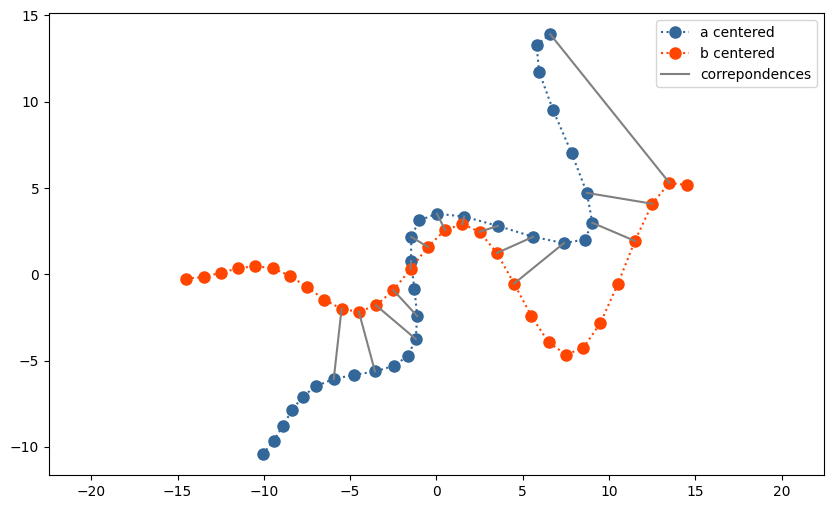

time: 125 ms (started: 2024-11-16 18:05:41 -03:00)


In [7]:
# (OPTIONALY) remove larger distances from the correspondences
print('correspondences:')
pprint(correspondences)

js = list(set([j for i, j, d in correspondences]))
grouped_correspondences = {}
for i, j, d in correspondences:
  if not j in grouped_correspondences:
    grouped_correspondences[j] = [(i, d)]
  else:
    grouped_correspondences[j].append((i, d))

new_correspondences = []
for k in grouped_correspondences:
  dmin = 100000000
  for c in grouped_correspondences[k]:
    if c[1]<dmin:
      dmin = c[1]
      idx = c[0]
  new_correspondences.append((idx, k, dmin))

print('\nnew_correspondences:')
pprint(new_correspondences)

ax = plot_data(a_centered, b_centered,
               label_1='a centered',
               label_2='b centered')
draw_correspondeces(a_centered, b_centered, new_correspondences, ax)
plt.show()

In [8]:
# compute cross covariance matrix
H = np.zeros((2,2))
for i, j,d  in correspondences:
  a_point = a_centered[:, [i]]
  b_point = b_centered[:, [j]]
  # H += np.outer(a_point,b_point)
  H += b_point.dot(a_point.T)
print(H)

[[1113.97274605 1153.71870122]
 [ 367.39948556  478.81890396]]
time: 0 ns (started: 2024-11-16 18:05:42 -03:00)


In [9]:
# SVD  decomposition
U, S, V_T = np.linalg.svd(H)
print(S)
R_found = U.dot(V_T)
t_found = b_center - R_found.dot(a_center)
print("R_found =\n", R_found)
print("t_found =\n", t_found)
R = R_found.copy()
t = t_found.copy()

[1712.35558954   63.95608054]
R_found =
 [[ 0.89668479  0.44266962]
 [-0.44266962  0.89668479]]
t_found =
 [[  0.4278782 ]
 [-10.01055887]]
time: 0 ns (started: 2024-11-16 18:05:42 -03:00)


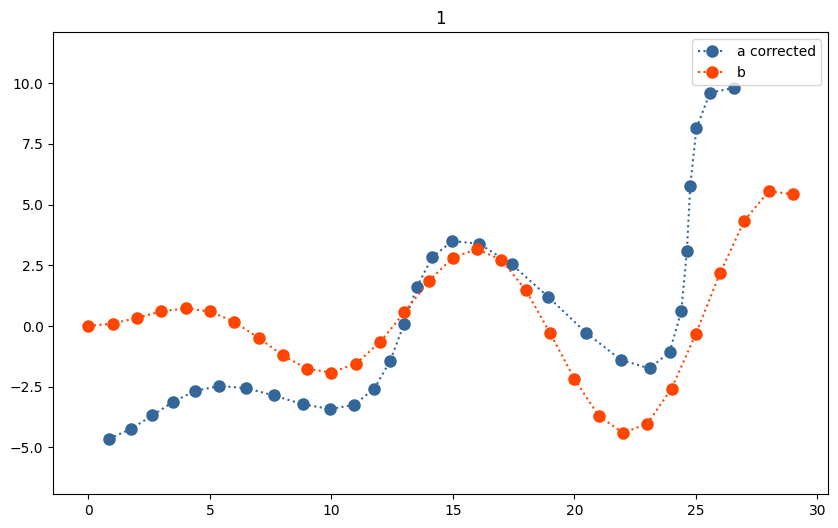

Squared diff: (a_corrected - b) =  16.052894296516946
time: 141 ms (started: 2024-11-16 18:05:42 -03:00)


In [10]:
# Apply correction
a_corrected = R_found.dot(a) + t_found
ax = plot_data(a_corrected, b, label_1='a corrected', label_2='b', title=f"{1}")
plt.show()
print("Squared diff: (a_corrected - b) = ", np.linalg.norm(a_corrected - b))

In [11]:
errors = []
iteration=1

time: 0 ns (started: 2024-11-16 18:05:42 -03:00)


  0%|          | 0/30 [00:00<?, ?it/s]

Error: 13.48821516883573


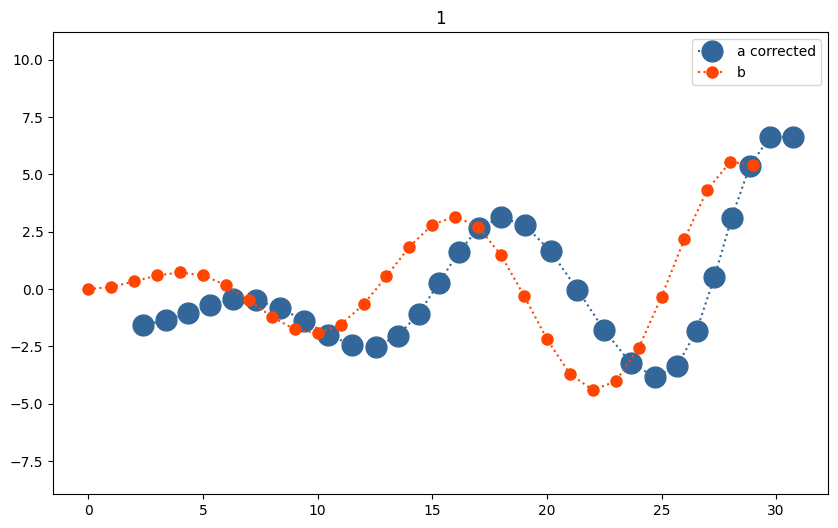

  0%|          | 0/30 [00:00<?, ?it/s]

Error: 3.141654843627609


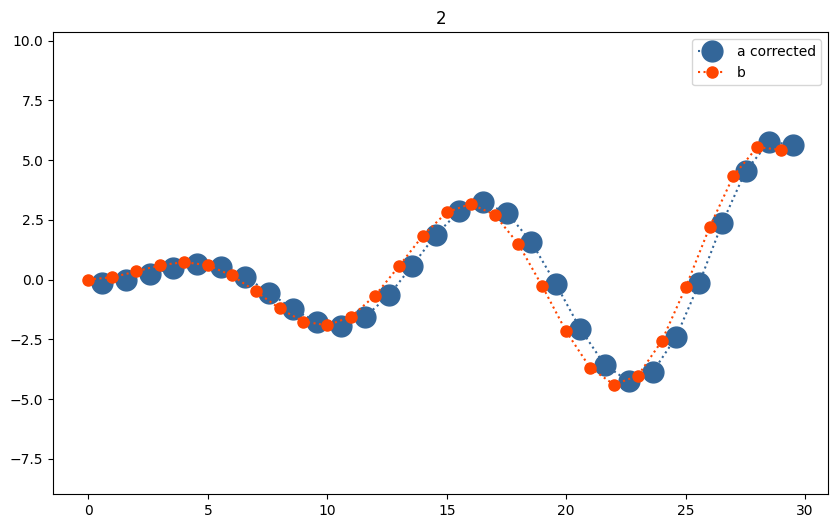

  0%|          | 0/30 [00:00<?, ?it/s]

Error: 0.3735968183661604


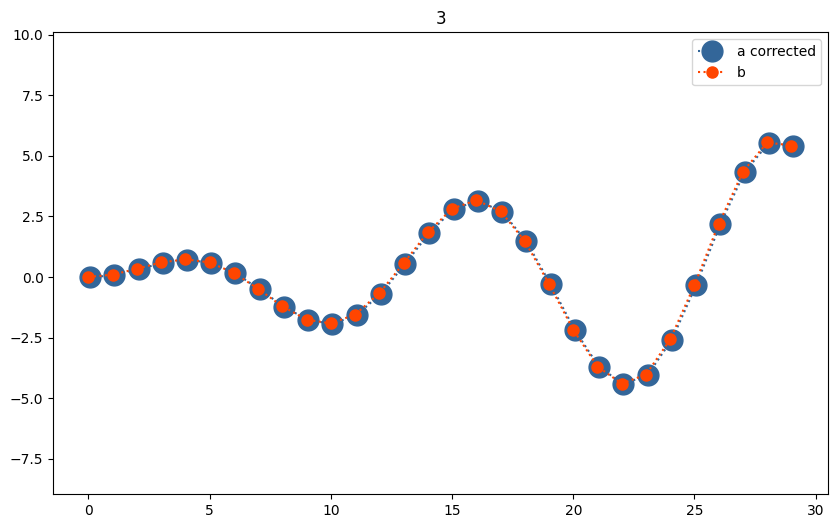

  0%|          | 0/30 [00:00<?, ?it/s]

Error: 3.2800585253515716e-14


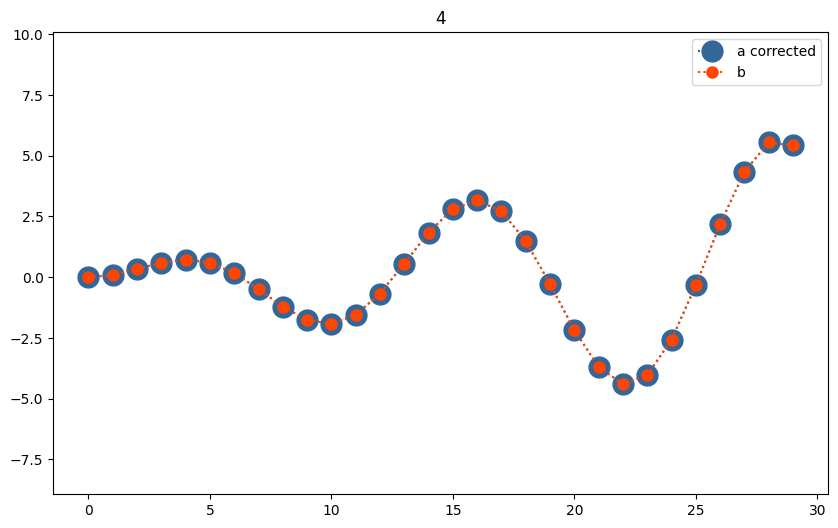

  0%|          | 0/30 [00:00<?, ?it/s]

Error: 3.340233328207498e-14


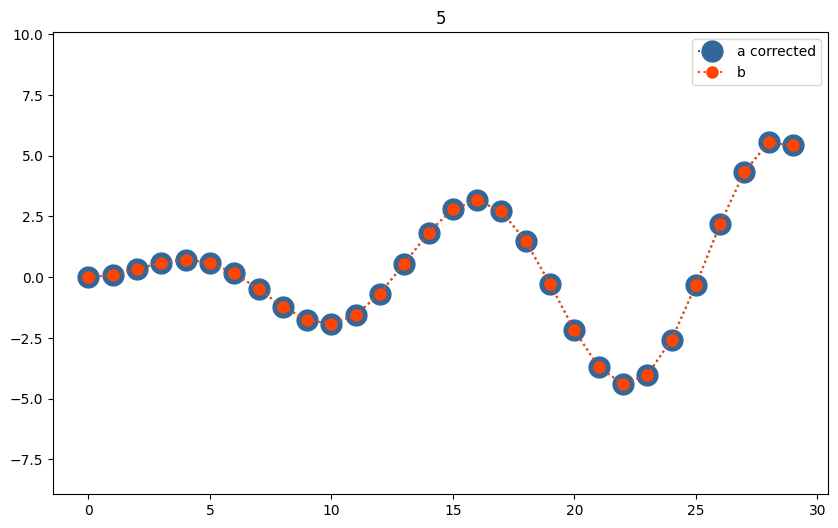

  0%|          | 0/30 [00:00<?, ?it/s]

Error: 4.071925516296018e-14


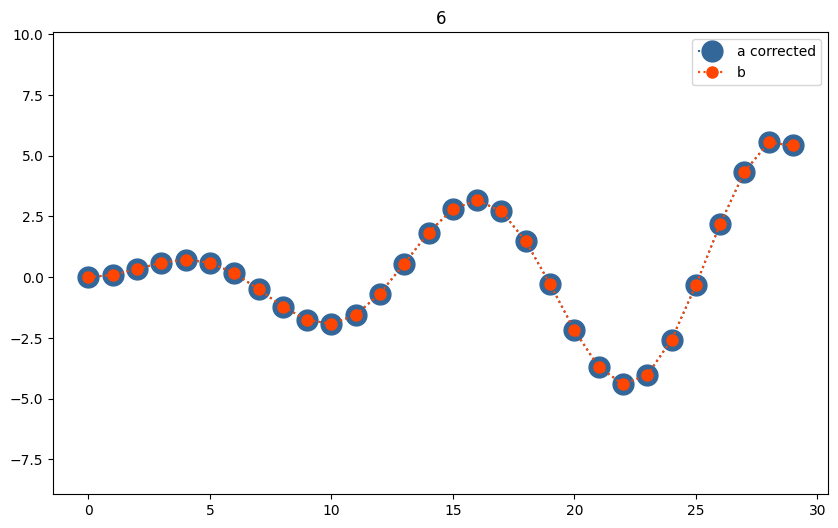

time: 1.3 s (started: 2024-11-16 18:05:42 -03:00)


In [12]:
######### Make next iterations - play this cell many times needed
for iteration in range(1,7):
  # shift point clouds to its centroid
  a_center = a_corrected.mean(axis=1).reshape((2,1))
  a_centered = a_corrected - a_center
  # compute correspondeces with nearest neighboor
  correspondences = nearest_neighbor(a_centered, b_centered)
  # compute cross covariance matrix
  H = np.zeros((2,2))
  for i, j,d  in correspondences:
    a_point = a_centered[:, [i]]
    b_point = b_centered[:, [j]]
    H += b_point.dot(a_point.T)
  # SVD decomposition
  U, S, V_T = np.linalg.svd(H)
  R_found = U.dot(V_T)
  t_found = b_center - R_found.dot(a_center)
  # stack transformations
  R = R_found.dot(R)
  t = t+t_found
  # Apply correction
  # a_corrected = R_found.dot(a_corrected) + t_found
  # or
  a_corrected = R.dot(a) + t
  # get last erros
  error = np.linalg.norm(a_corrected - b)
  print("Error:", error)
  errors.append(error)

  plot_data(a_corrected, b, label_1='a corrected', label_2='b',markersize_1=15,title=f"{iteration}")
  plt.show()

In [13]:
R_true, t_true, R, t

(array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]),
 array([[-2],
        [ 5]]),
 array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]),
 array([[-2.12132034],
        [-4.94974747]]))

time: 0 ns (started: 2024-11-16 18:05:43 -03:00)


### Outlier injection on point cloud

In [14]:
# Outlier injection
a_bad = moved_data.copy()
b = true_data.copy()
print("a[10] and a[20] original values",a[:,10],a[:,20])
a_bad[:, 10] = np.array([-10, 30])
a_bad[:, 20] = np.array([0, 40])
print("a[10] and a[20] outlierized values",a_bad[:,10],a_bad[:,20])

a[10] and a[20] original values [ 6.42719153 10.7149441 ] [13.68085969 17.60341156]
a[10] and a[20] outlierized values [-10.  30.] [ 0. 40.]
time: 0 ns (started: 2024-11-16 18:05:43 -03:00)


In [15]:
# initializations
a_corrected = a_bad.copy()
b_center = b.mean(axis=1).reshape((b.shape[0],1))
b_centered = b - b_center

R = np.eye(2)
t = np.zeros((b.shape[0],1))
iteration = 0
error = np.linalg.norm(a_corrected - b)
errors = []
exclude_indices = [] # <<--- for removing outliers
threshold = 1 # <<--- for removing outliers, can be adaptative
print(f"Iteration {iteration} error: {error}")

Iteration 0 error: 112.11909435083369
time: 0 ns (started: 2024-11-16 18:05:43 -03:00)


  0%|          | 0/30 [00:00<?, ?it/s]

Iteration 1 error: 41.921093356811056
Iteration 1 ||I-R||: 0.46648520398936305 ||t||: 13.55671049844146


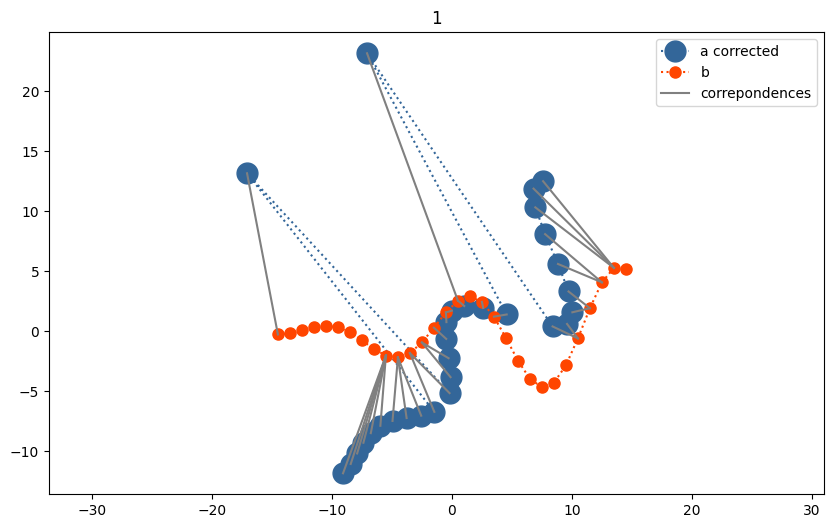

  0%|          | 0/30 [00:00<?, ?it/s]

Iteration 2 error: 40.66647933287497
Iteration 2 ||I-R||: 0.3064646688023921 ||t||: 3.142664790277814


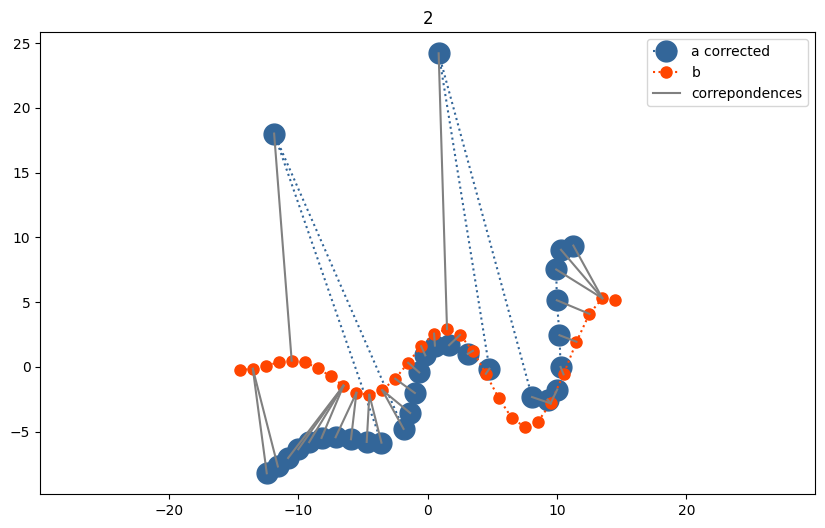

  0%|          | 0/30 [00:00<?, ?it/s]

Iteration 3 error: 39.26739541114459
Iteration 3 ||I-R||: 0.42100505945234795 ||t||: 5.463051787034761


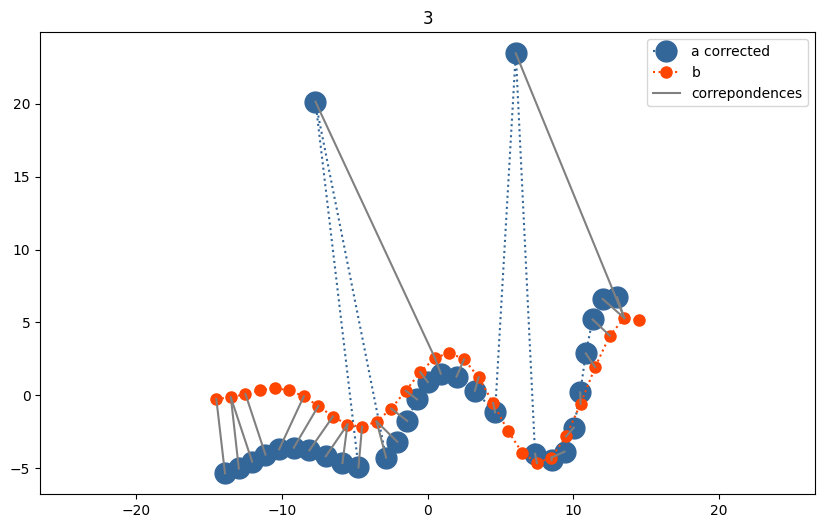

  0%|          | 0/30 [00:00<?, ?it/s]

Iteration 4 error: 35.89983382133666
Iteration 4 ||I-R||: 0.12651852745652994 ||t||: 3.3512605836029343


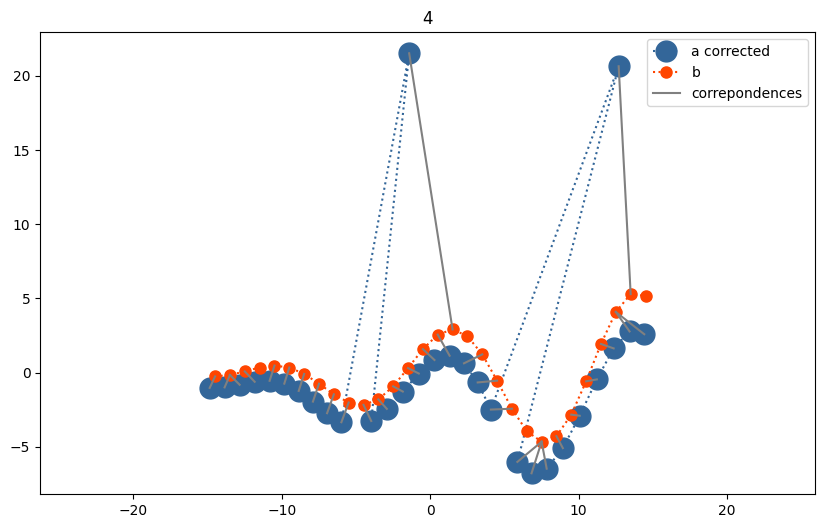

  0%|          | 0/30 [00:00<?, ?it/s]

Iteration 5 error: 36.09401457701451
Iteration 5 ||I-R||: 0.041471326365322324 ||t||: 0.6391503320706831


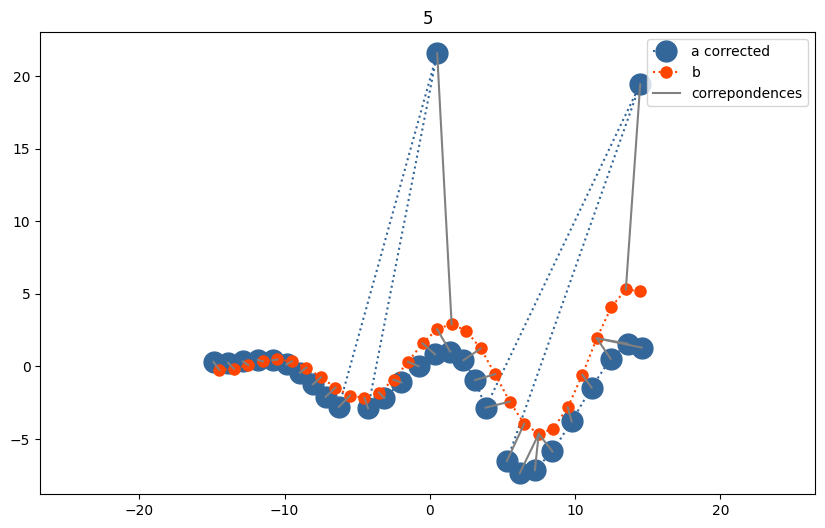

  0%|          | 0/30 [00:00<?, ?it/s]

Iteration 6 error: 36.16833936962947
Iteration 6 ||I-R||: 0.010920528213951078 ||t||: 0.22813357535860176


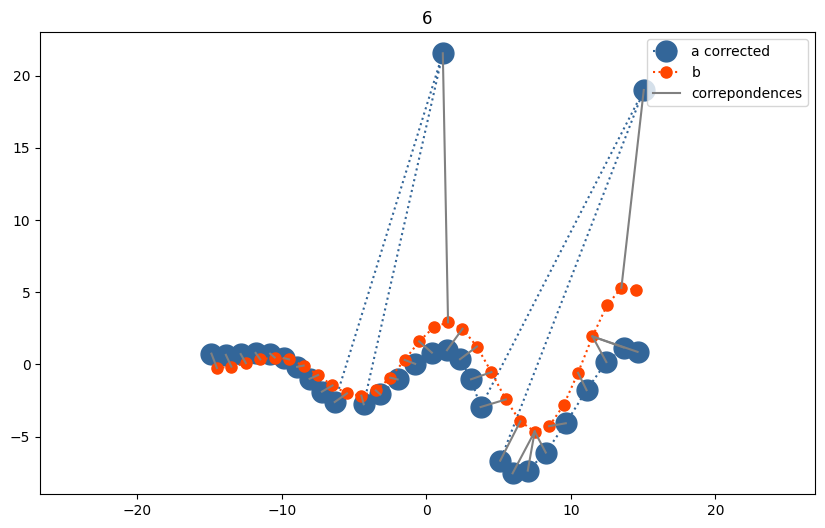

  0%|          | 0/30 [00:00<?, ?it/s]

Iteration 7 error: 36.30431977306389
Iteration 7 ||I-R||: 0.017003022932035403 ||t||: 0.20193221032177766


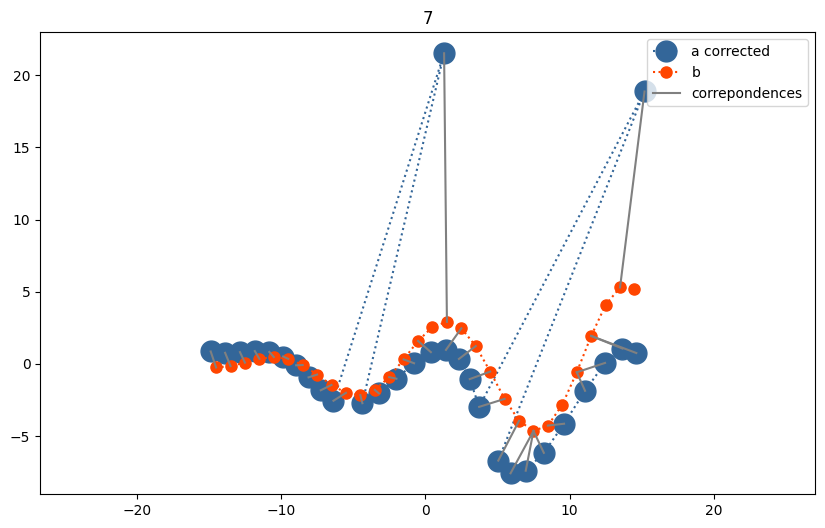

  0%|          | 0/30 [00:00<?, ?it/s]

Iteration 8 error: 36.30296364950159
Iteration 8 ||I-R||: 3.103766229860222e-16 ||t||: 0.05729003631911676


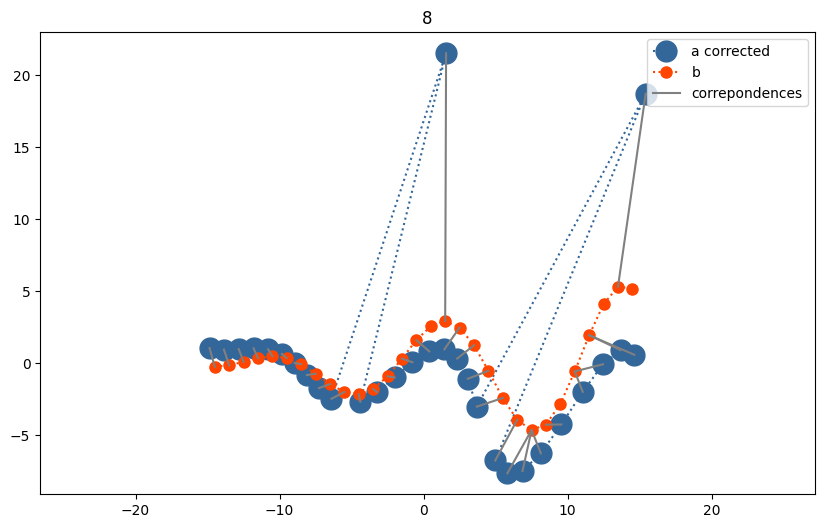

  0%|          | 0/30 [00:00<?, ?it/s]

Iteration 9 error: 36.3029636495016
Iteration 9 ||I-R||: 2.543496323945741e-16 ||t||: 1.897149936107019e-15


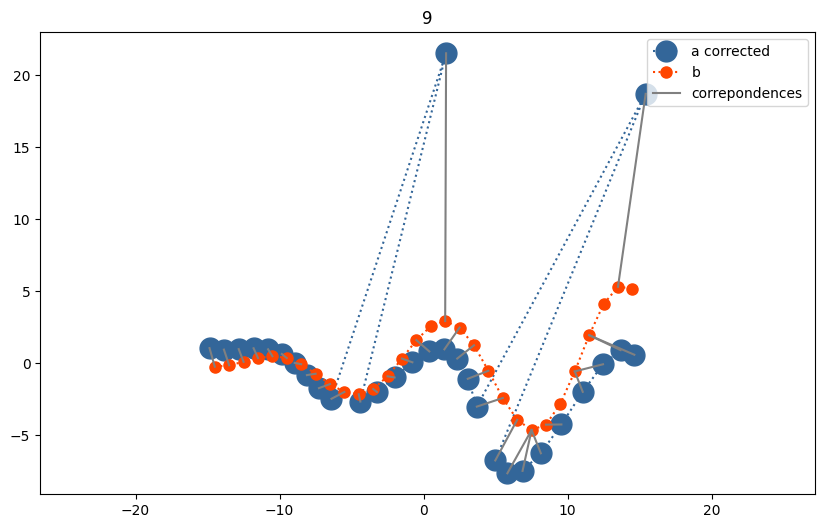

  0%|          | 0/30 [00:00<?, ?it/s]

Iteration 10 error: 36.30296364950159
Iteration 10 ||I-R||: 2.6174693485960674e-16 ||t||: 5.329070518200751e-15


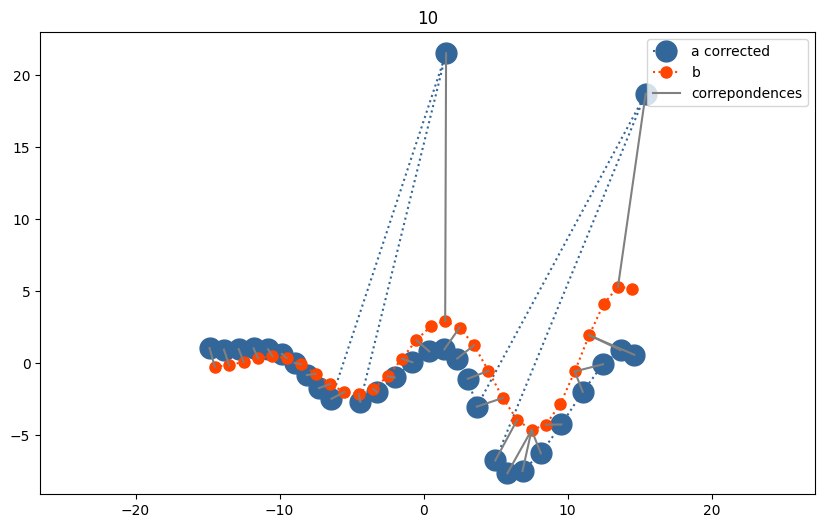

  0%|          | 0/30 [00:00<?, ?it/s]

Iteration 11 error: 36.302963649501585
Iteration 11 ||I-R||: 2.503138313698455e-16 ||t||: 3.614624287906422e-15


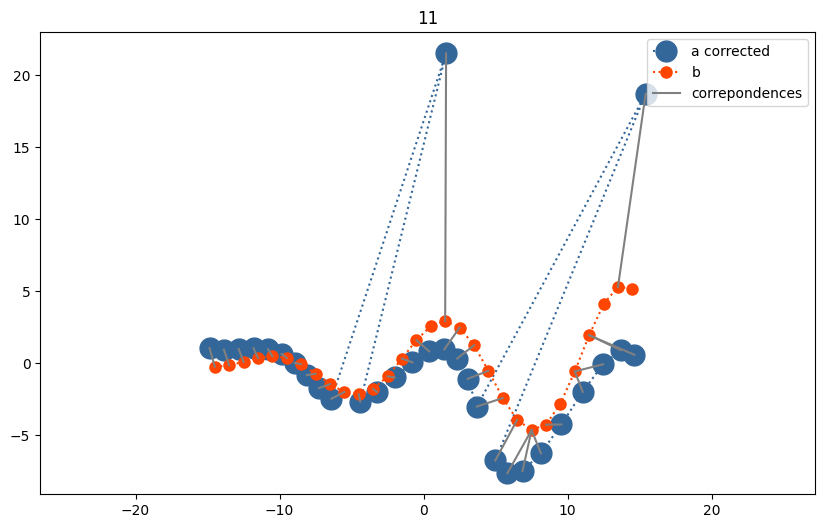

  0%|          | 0/30 [00:00<?, ?it/s]

Iteration 12 error: 36.302963649501585
Iteration 12 ||I-R||: 2.499742657118071e-16 ||t||: 3.5566146649215975e-15


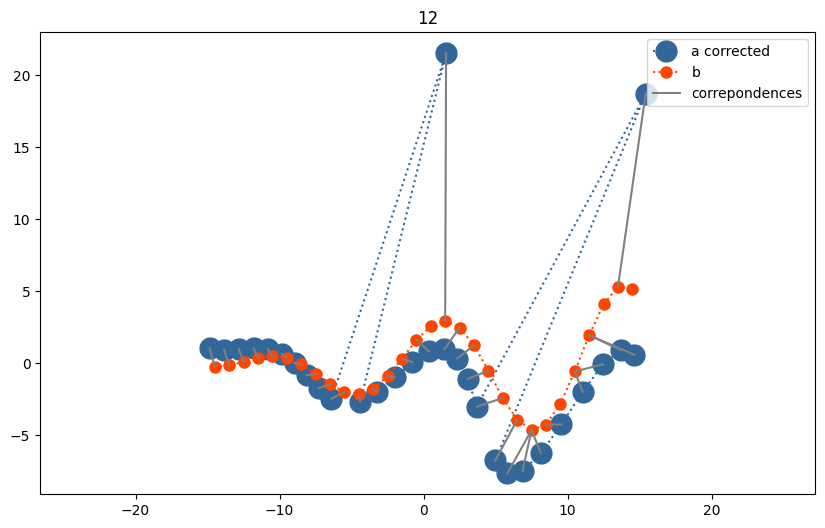

  0%|          | 0/30 [00:00<?, ?it/s]

Iteration 13 error: 36.302963649501585
Iteration 13 ||I-R||: 4.630591449227609e-17 ||t||: 1.1102230246251565e-16


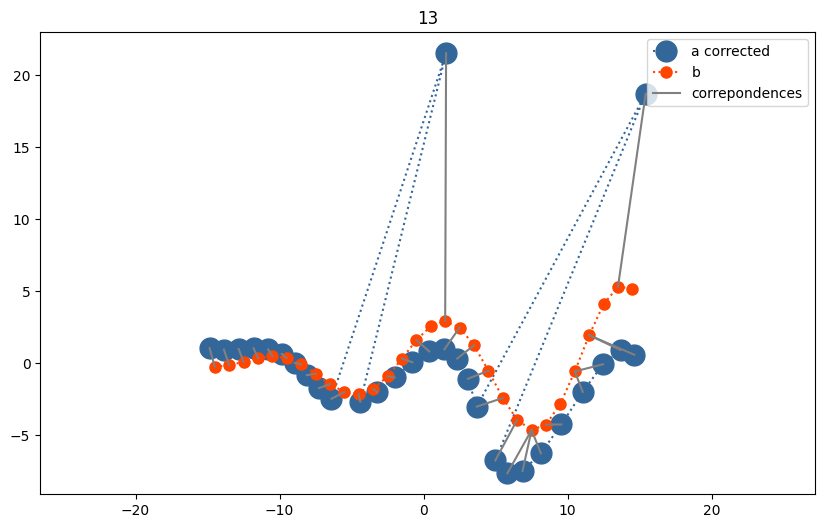

time: 2.45 s (started: 2024-11-16 18:05:43 -03:00)


In [16]:
######### Make next iterations
for iteration in range(1,14):
  # shift point clouds to its centroid
  # reduced_data = np.delete(a_corrected, exclude_indices, axis=1)
  a_center = a_corrected.mean(axis=1).reshape((b.shape[0],1))
  a_centered = a_corrected - a_center
  # compute correspondeces with nearest neighboor
  correspondences = nearest_neighbor(a_centered, b_centered)
  # compute cross covariance matrix
  exclude_indices = []
  norms = [] # (A*)
  H = np.zeros((b.shape[0],b.shape[0]))
  for i, j, d in correspondences:
    a_point = a_centered[:, [i]]
    b_point = b_centered[:, [j]]
    H += b_point.dot(a_point.T)
  # SVD decomposition
  U, S, V_T = np.linalg.svd(H)
  R_found = U.dot(V_T)
  t_found = b_center - R_found.dot(a_center)
  # stack transformations
  R = R_found.dot(R)
  t = t+t_found
  # Apply correction
  # a_corrected = R_found.dot(a_corrected) + t_found
  # or
  a_corrected = R.dot(a_bad) + t
  # get last erros
  error = np.linalg.norm(a_corrected - b)
  print(f"Iteration {iteration} error: {error}")
  print(f"Iteration {iteration} ||I-R||: {np.linalg.norm(np.eye(2)-R_found)} ||t||: {np.linalg.norm(t_found)}")
  errors.append(error)

  ax = plot_data(a_centered, b_centered, label_1='a corrected', label_2='b',markersize_1=15,title=f"{iteration}")
  draw_correspondeces(a_centered, b_centered, correspondences, ax)
  plt.show()

Notice that it never gets better!

### Solution - weight and remove bad correspondences

In [17]:
# initializations
a_corrected = a_bad.copy()
a_center = a_corrected.mean(axis=1).reshape((b.shape[0],1))
a_centered = a_corrected - a_center
b_center = b.mean(axis=1).reshape((b.shape[0],1))
b_centered = b - b_center

R = np.eye(2)
t = np.zeros((b.shape[0],1))
iteration = 0
error = np.linalg.norm(a_centered - b_centered)
errors = []
errors2 = []
exclude_a_indices = []
threshold = 0.1 # <<--- for removing outliers, can be adaptative
print(f"Iteration {iteration} error: {error}")

Iteration 0 error: 51.76451406494949
time: 0 ns (started: 2024-11-16 18:05:46 -03:00)


  0%|          | 0/30 [00:00<?, ?it/s]

[0, 10, 20]
Iteration 1 ||a_centered - b_centered||: 51.76451406494949
Iteration 1 ||I-R||: 0.3686327100069349 ||t||: 14.553897977955172 sum: 14.922530687962107


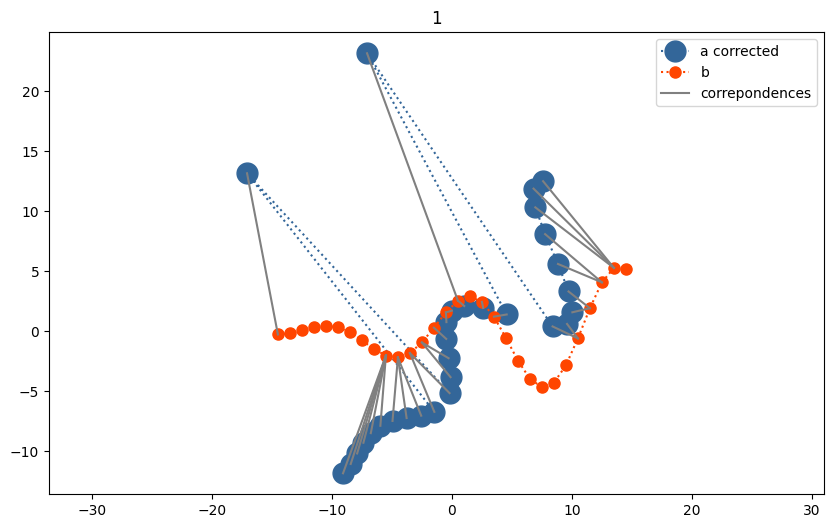

  0%|          | 0/30 [00:00<?, ?it/s]

[10, 20]
Iteration 2 ||a_centered - b_centered||: 44.5778274914632
Iteration 2 ||I-R||: 0.36028308979022644 ||t||: 5.074678218612856 sum: 5.434961308403083


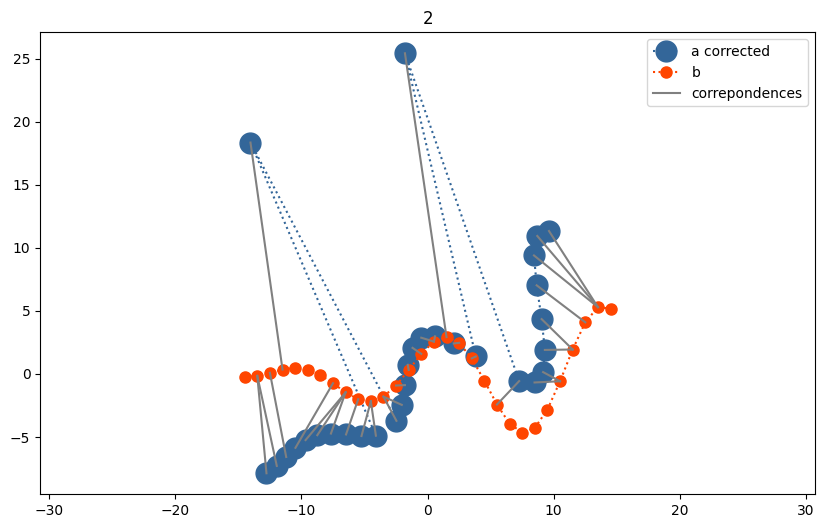

  0%|          | 0/30 [00:00<?, ?it/s]

[10, 20]
Iteration 3 ||a_centered - b_centered||: 38.82812246424843
Iteration 3 ||I-R||: 0.18207559363843104 ||t||: 2.0496995336434494 sum: 2.2317751272818804


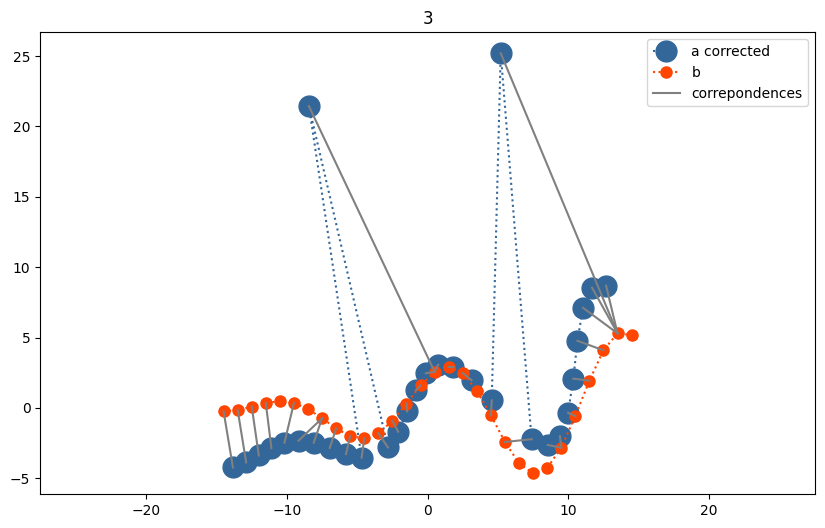

  0%|          | 0/30 [00:00<?, ?it/s]

[10, 20]
Iteration 4 ||a_centered - b_centered||: 37.06432571741969
Iteration 4 ||I-R||: 0.12039380530090023 ||t||: 1.2345872506780395 sum: 1.3549810559789397


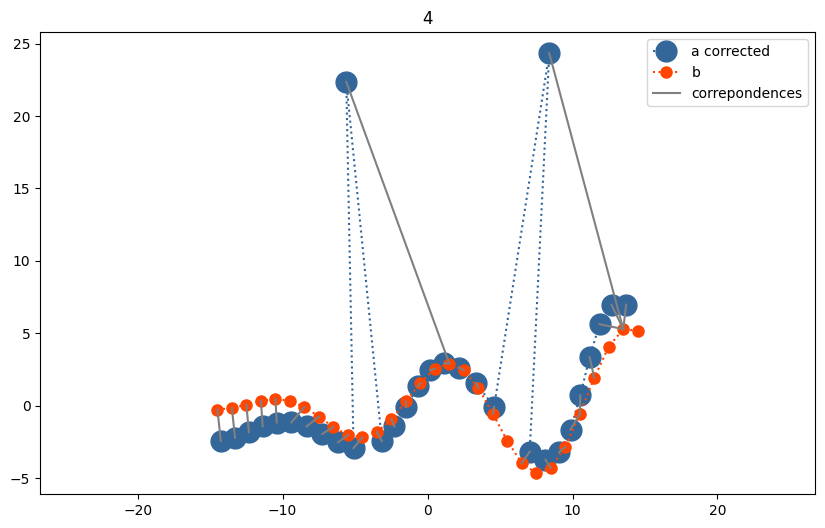

  0%|          | 0/30 [00:00<?, ?it/s]

[10, 20]
Iteration 5 ||a_centered - b_centered||: 36.43205676580487
Iteration 5 ||I-R||: 0.06620161078425592 ||t||: 0.678869352491353 sum: 0.745070963275609


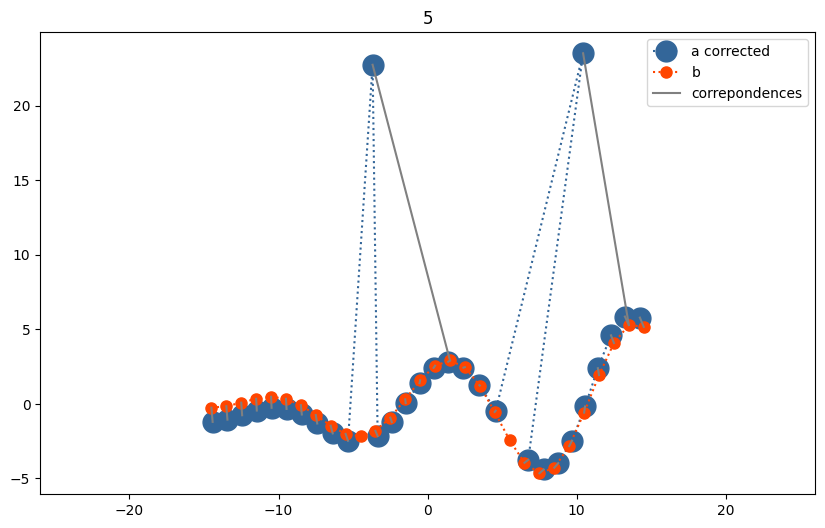

  0%|          | 0/30 [00:00<?, ?it/s]

[10, 20]
Iteration 6 ||a_centered - b_centered||: 36.27894969438916
Iteration 6 ||I-R||: 0.0010631878316571006 ||t||: 0.010902538870329253 sum: 0.011965726701986354


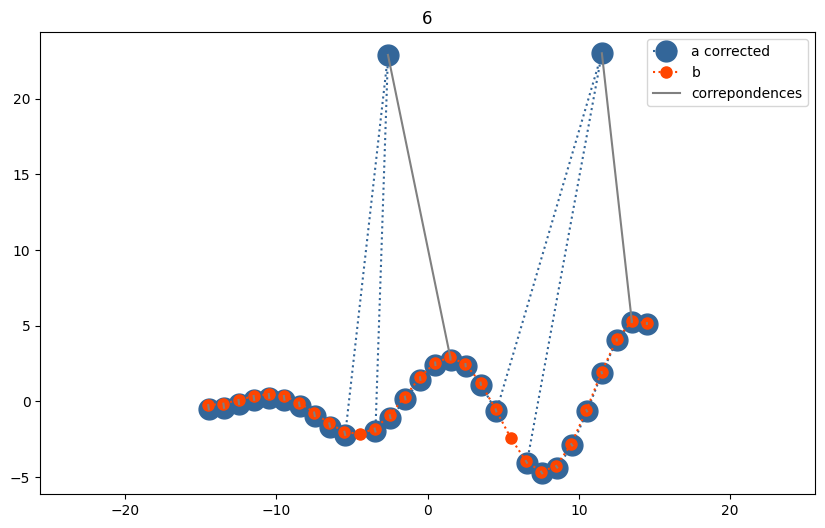

  0%|          | 0/30 [00:00<?, ?it/s]

[10, 20]
Iteration 7 ||a_centered - b_centered||: 36.27763935330488
Iteration 7 ||I-R||: 0.0009638780754089585 ||t||: 0.009884159572279144 sum: 0.010848037647688102


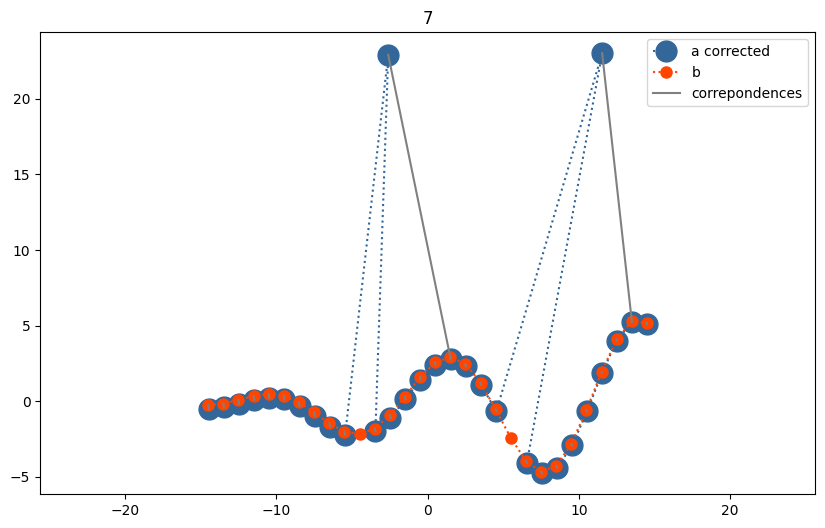

  0%|          | 0/30 [00:00<?, ?it/s]

[10, 20]
Iteration 8 ||a_centered - b_centered||: 36.27648290098333
Iteration 8 ||I-R||: 0.0008712977403486276 ||t||: 0.008934787625414189 sum: 0.009806085365762817


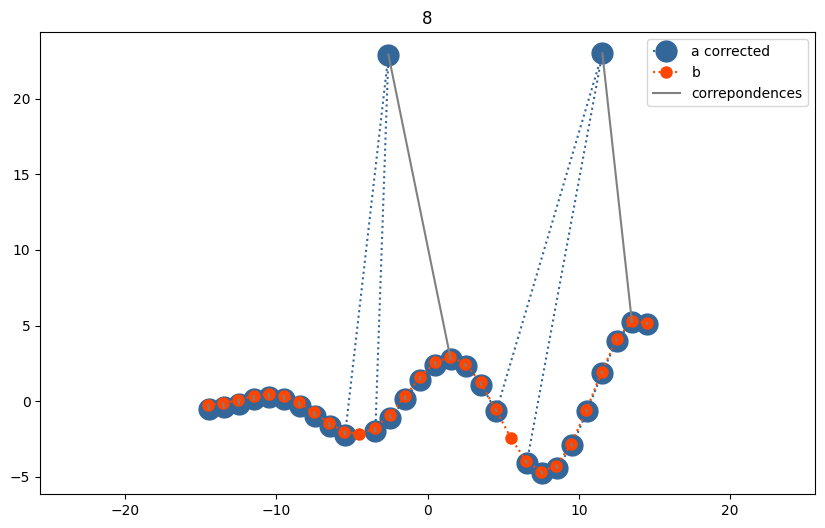

  0%|          | 0/30 [00:00<?, ?it/s]

[10, 20]
Iteration 9 ||a_centered - b_centered||: 36.275463301883214
Iteration 9 ||I-R||: 0.0007854248384317475 ||t||: 0.008054197551694162 sum: 0.008839622390125909


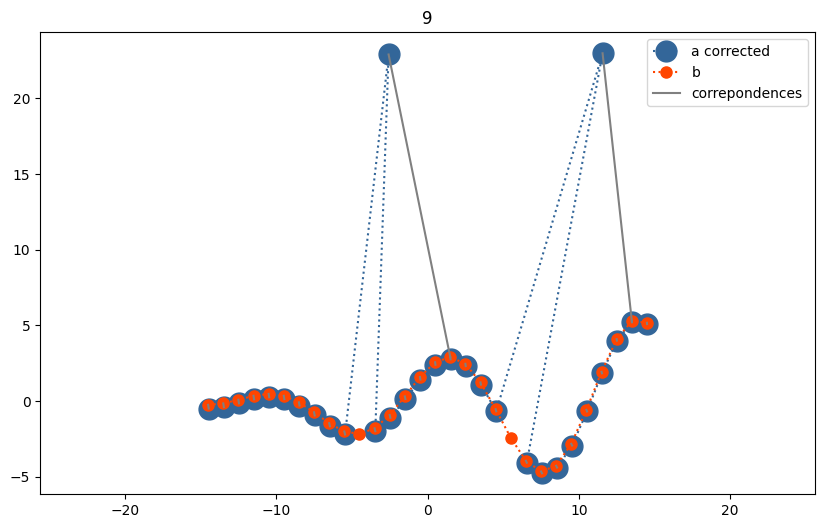

  0%|          | 0/30 [00:00<?, ?it/s]

[10, 20]
Iteration 10 ||a_centered - b_centered||: 36.27456517027614
Iteration 10 ||I-R||: 0.0007067169359771237 ||t||: 0.007247081499043364 sum: 0.007953798435020488


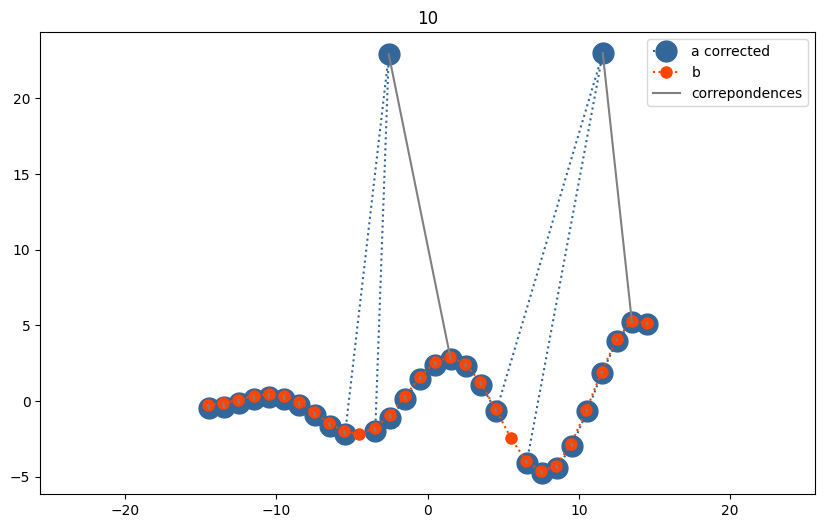

  0%|          | 0/30 [00:00<?, ?it/s]

[10, 20]
Iteration 11 ||a_centered - b_centered||: 36.27377404344153
Iteration 11 ||I-R||: 0.0006352923084096361 ||t||: 0.006514652331622089 sum: 0.007149944640031726


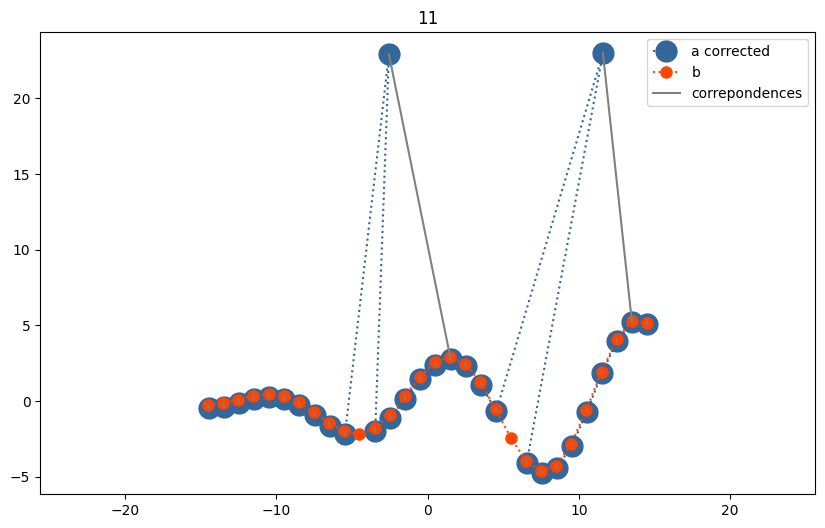

  0%|          | 0/30 [00:00<?, ?it/s]

[10, 20]
Iteration 12 ||a_centered - b_centered||: 36.27307661950666
Iteration 12 ||I-R||: 0.0005709215798174687 ||t||: 0.005854557897044205 sum: 0.006425479476861674


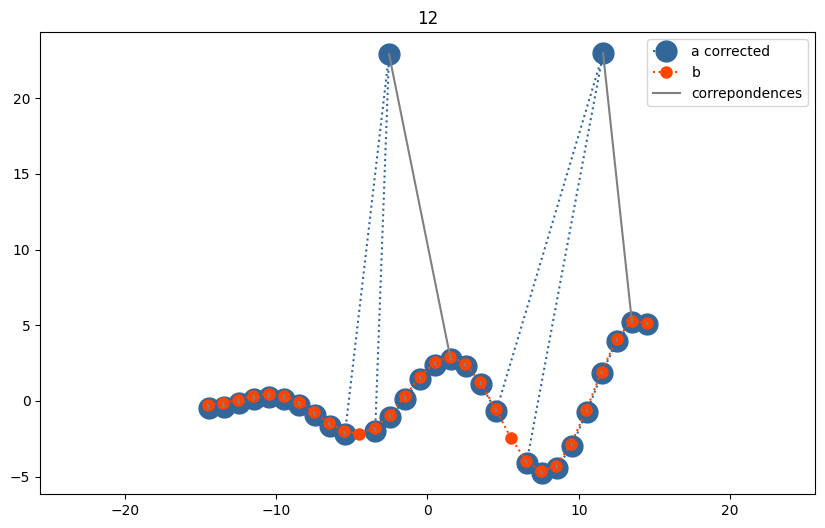

  0%|          | 0/30 [00:00<?, ?it/s]

[10, 20]
Iteration 13 ||a_centered - b_centered||: 36.27246096681417
Iteration 13 ||I-R||: 0.0005131566137355356 ||t||: 0.005262202746525204 sum: 0.0057753593602607395


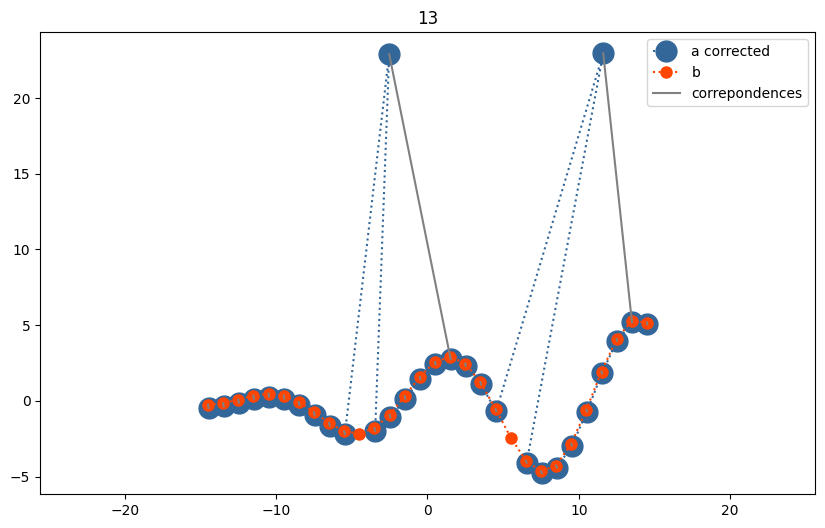

time: 2.26 s (started: 2024-11-16 18:05:46 -03:00)


In [18]:
######### Make next iterations
for iteration in range(1,14):
  # shift point clouds to its centroid
  reduced_a = np.delete(a_corrected, exclude_a_indices, axis=1)
  a_center = reduced_a.mean(axis=1).reshape((b.shape[0],1))
  a_centered = a_corrected - a_center
  # compute correspondeces with nearest neighboor
  correspondences = nearest_neighbor(a_centered, b_centered)
  # compute cross covariance matrix
  exclude_a_indices = []          # <<<<------------- for removing outliers
  exclude_b_indices = []
  H = np.zeros((b.shape[0],b.shape[0]))
  for k, (i, j, d) in enumerate(correspondences):
    a_point = a_centered[:, [i]]
    b_point = b_centered[:, [j]]
    weight =  1/d                 # <<<<------------- for removing outliers
    if weight < threshold:        # <<<<------------- for removing outliers
      weight = 0                  # <<<<------------- for removing outliers
      exclude_a_indices.append(i) # <<<<------------- for removing outliers
      exclude_b_indices.append(j)
    H += weight * b_point.dot(a_point.T)
  print(exclude_a_indices)
  # SVD decomposition
  U, S, V_T = np.linalg.svd(H)
  R_found = U.dot(V_T)
  t_found = b_center - R_found.dot(a_center)
  # stack transformations
  R = R_found.dot(R)
  t = t+t_found
  # Apply correction
  a_corrected = R_found.dot(a_corrected) + t_found
  # or
  # a_corrected = R.dot(a) + t
  # get last erros
  error = np.linalg.norm(a_centered - b_centered)
  print(f"Iteration {iteration} ||a_centered - b_centered||: {error}")
  errors.append(error)

  I_R_norm = np.linalg.norm(np.eye(b.shape[0])-R_found)
  t_norm = np.linalg.norm(t_found)
  error = I_R_norm + t_norm
  print(f"Iteration {iteration} ||I-R||: {I_R_norm} ||t||: {t_norm} sum: {error}")
  errors2.append(error)

  ax = plot_data(a_centered, b_centered, label_1='a corrected', label_2='b',markersize_1=15,title=f"{iteration}")
  draw_correspondeces(a_centered, b_centered, correspondences, ax)
  plt.show()

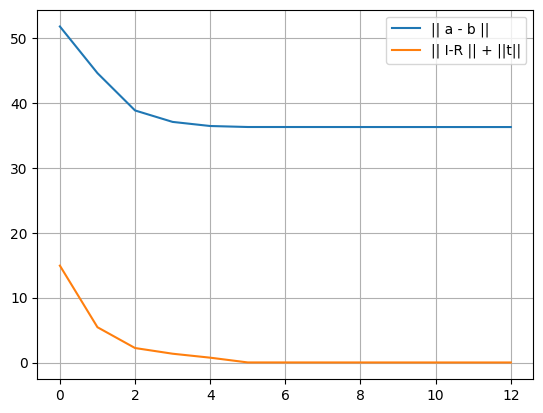

time: 156 ms (started: 2024-11-16 18:05:48 -03:00)


In [19]:
plt.plot(errors, label="|| a - b ||")
plt.plot(errors2, label="|| I-R || + ||t||")
plt.legend()
plt.grid(True)
plt.show()